In [26]:
import numpy as np
import mahotas
import pandas as pd
import json
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import skimage.exposure

In [27]:
DATASET_FOLDER = "/Users/jiehyun/kaggle/input/hubmap-organ-segmentation/"
TRAIN_IMAGES = DATASET_FOLDER + "train_images"
TRAIN_ANNOT = DATASET_FOLDER + "train_annotations"
TRAIN_CSV = DATASET_FOLDER + "train.csv"

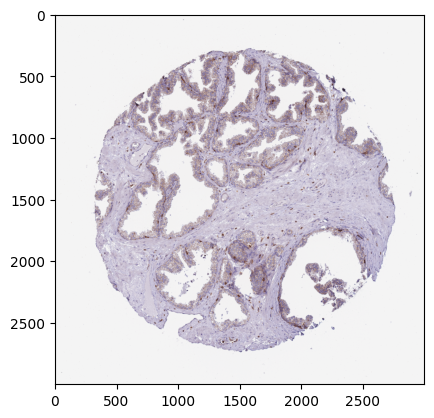

In [28]:
img = mahotas.imread(TRAIN_IMAGES + '/10044.tiff')
plt.imshow(img)

In [29]:
with open(TRAIN_ANNOT + '/10044.json') as json_file:
    data = json.load(json_file)

In [30]:
len(data)

9

In [31]:
print(len(data[0]))
print(len(data[1]))
print(len(data[2]))
print(len(data[3]))
print(len(data[4]))
print(len(data[5]))
print(len(data[6]))
print(len(data[7]))
print(len(data[8]))

101
93
108
70
75
53
45
320
140


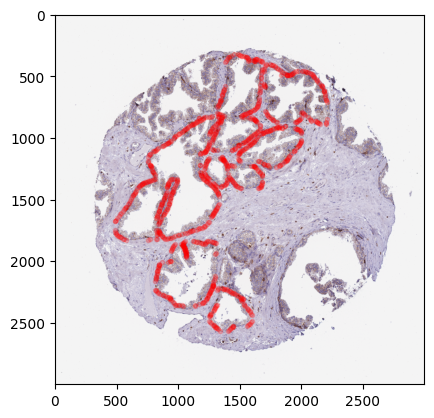

In [32]:
#reference: https://github.com/maftouni/binary_mask_from_json/blob/main/binary_mask_from_json.py
x_val = []
y_val = []
for i in range(len(data)):
    for j in range(len(data[i])):        
        #if data[i][j] != {}:
        shape1_x=data[i][j][0]
        shape1_y=data[i][j][1]
        x_val.append(shape1_x)
        y_val.append(shape1_y)

fig = plt.figure()

plt.imshow(img.astype(np.uint8)) 
plt.scatter(x_val, y_val, zorder=2, color='red', marker = '.', alpha= 0.2)

#cv2.imwrite('10044.png', img3)


In [33]:
ab=np.stack((x_val, y_val), axis=1)
img2=cv2.drawContours(img, [ab], -1, (255, 255, 255), 1)

In [34]:
mask = np.zeros((img.shape[0],img.shape[1]))
img3=cv2.drawContours(mask, [ab], -1, (255, 255, 255), -1)

In [36]:
from tifffile import imread

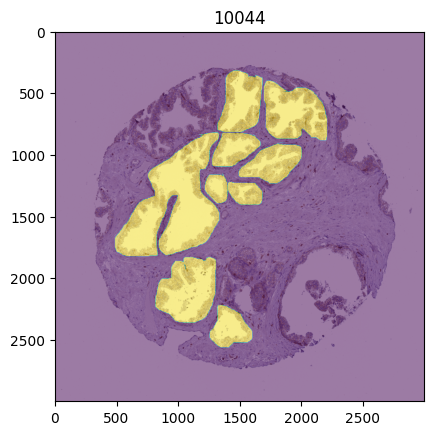

In [39]:
img_path = TRAIN_IMAGES + '/10044.tiff'
annot_path = TRAIN_ANNOT + '/10044.json'
shape = (img.shape[0], img.shape[1])
polygon = data

poly_img = np.zeros(shape)
for i in range(len(polygon)):
    poly_img = cv2.fillPoly(poly_img, pts = [np.array(polygon[i])], color = (255,255,255))

plt.title('10044')
plt.imshow(imread(img_path))
plt.imshow(poly_img, alpha = 0.5)
plt.show()